# Ensembles: Random forests

To understand what are the Random forests, first we need to know what Ensemble methods are.

Ensemble methods are a machine learning technique that combines several base models in order to produce one optimal predictive model. This characteristic makes these algorithms more robust and complex, leading to a higher computational cost that is usually accompanied by better results.

Usually when creating a model, we choose the algorithm that presents the best performance for the data in question. We can test different configurations of this chosen algorithm, thus generating different models, but at the end of the machine learning process, we choose only one. With an ensemble method, several different models will be created from an algorithm, but we will not choose only one for final use, but all.



With that, we understand the concept of Random Forest. Random Forest is a method of joint learning. The idea, however, is to train several decision trees (uncorrelated), obtained from samples of the dataset, and make predictions using the results that appear most in case of a classification problem, or the average of the values ​​obtained in case of regression.


In a simpler way, the random forest algorithm creates several decision trees and combines them to obtain a more accurate and more stable prediction.

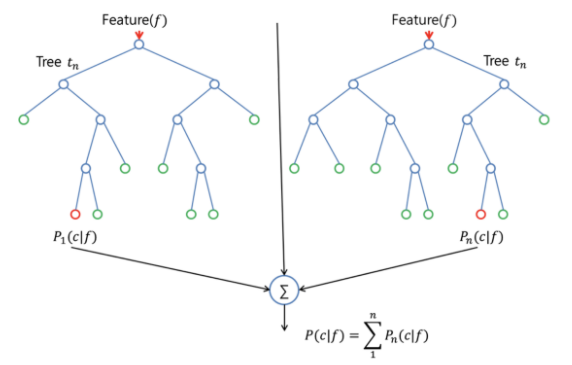

# Let's start working with RandomForest algorithm

A random forest classifier is a meta estimator that fits a number of decision tree classifiers on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting.

So, to start working with it, let's prepare the data!

For this notebook, we'll work with the Wine Dataset. 

The data is the results of a chemical analysis of wines grown in the same region in Italy by three different cultivators. There are thirteen different measurements taken for different constituents found in the three types of wine.

## Preparing the data

Now that we have predicted the species of all plants in the test data, we can compare our predicted species with the that plant’s actual species.

In [1]:
# load the libraries and the iris dataset
from sklearn.datasets import load_wine
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import numpy as np

# set random seed
np.random.seed(0)

#load wine dataset
wine = load_wine()

In [2]:
dataf = pd.DataFrame(wine.data, columns=wine.feature_names)
dataf.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [3]:
# add a new column with the class of the wine, this is what we are going to try to predict
dataf['type'] = pd.Categorical.from_codes(wine.target, wine.target_names)
dataf.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,type
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,class_0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,class_0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,class_0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,class_0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,class_0


In [6]:
# Create a new column that for each row, generates a random number between 0 and 1, and
# if that value is less than or equal to .75, then sets the value of that cell as True
# and false otherwise.
dataf['random'] = np.random.uniform(0, 1, len(dataf)) <= .75
dataf.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,type,random
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,class_0,True
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,class_0,True
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,class_0,True
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,class_0,False
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,class_0,True


In [7]:
# creating two new dataframes, one with the training rows, one with the test rows
train, test = dataf[dataf['random']==True], dataf[dataf['random']==False]

In [8]:
print('Number of observations in the training data:', len(train))
print('Number of observations in the test data:',len(test))

Number of observations in the training data: 133
Number of observations in the test data: 45


In [9]:
# list of the column's names
columns = dataf.columns[:13]
columns

Index(['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
       'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines', 'proline'],
      dtype='object')

In [10]:
# converting each type of wine into a number, that will be 0,1 or 2.
y = pd.factorize(train['type'])[0]
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2])

In [11]:
clf = RandomForestClassifier(n_jobs=2, random_state=0)
clf.fit(train[columns], y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=2,
                       oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

#### *RandomForestClassifier*
*n_jobs*: The number of jobs to run in parallel. 

*random_state*: Controls both the randomness of the bootstrapping of the samples used when building trees (if bootstrap=True) and the sampling of the features to consider when looking for the best split at each node (if max_features < n_features).

*.fit()*: Build a forest of trees from the training set. 

*train*: Train the Classifier to take the training features. 

So, we combined with the *fit* function to learn how they relate to the the species.

In [12]:
# Apply the Classifier we trained to the test data.
clf.predict(test[columns])

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2,
       2])

The predicted class of an input sample is a vote by the trees in the forest, weighted by their probability estimates. That is, the predicted class is the one with highest mean probability estimate across the trees.

In [13]:
# view some of the predicted probabilities
clf.predict_proba(test[columns])[0:10]

array([[0.98, 0.02, 0.  ],
       [1.  , 0.  , 0.  ],
       [1.  , 0.  , 0.  ],
       [0.91, 0.09, 0.  ],
       [0.99, 0.  , 0.01],
       [0.9 , 0.09, 0.01],
       [0.53, 0.4 , 0.07],
       [0.69, 0.31, 0.  ],
       [0.99, 0.  , 0.01],
       [0.99, 0.01, 0.  ]])

In [14]:
# convert the number prediction to the type name
preds = wine.target_names[clf.predict(test[columns])]

In [15]:
# view the PREDICTED type for the first five observations
preds[0:5]

array(['class_0', 'class_0', 'class_0', 'class_0', 'class_0'], dtype='<U7')

In [16]:
# view the ACTUAL type for the first five observations
test['type'].head()

3     class_0
5     class_0
8     class_0
12    class_0
16    class_0
Name: type, dtype: category
Categories (3, object): ['class_0', 'class_1', 'class_2']